In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
#load both data sets
#the files are using semicolons as separators
data_rw = pd.read_csv('winequality-red.csv', sep=';')
data_ww = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
#Adding type column to distinguish between red and white wines
data_rw.insert(0, 'type', 'red')
data_ww.insert(0, 'type', 'white')

In [4]:
#Sanity check
data_rw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data_ww.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#Merging both datasets
wines = data_rw.append(data_ww, ignore_index=True)

In [7]:
#Confirming datsets have merged
wines.shape

(6497, 13)

In [8]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


Since I'm interested in wine quality, I will separate the wines into categories based on their quality ratings.  This will be a new column called Quality Class.

* Low quality: <= 5
* Medium quality: 6-7
* High quality: > 7

In [9]:
wines['quality class'] = wines.quality.apply(lambda q: 'low' if q <= 5 \
                                             else 'high' if q > 7 else 'medium')

In [12]:
wines.shape

(6497, 14)

In [10]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality class
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [11]:
wines.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality class
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium
6496,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


In [16]:
wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'quality class'],
      dtype='object')

In [17]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
quality class           6497 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [18]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
#looking at summary stats of each wine dataset
#Transposing data table and rounding decimal point to hundredths place
round(wines.loc[wines.type == 'red', wines.columns].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [26]:
round(wines.loc[wines.type == 'white', wines.columns].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4898.0,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4898.0,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4898.0,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4898.0,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4898.0,35.31,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4898.0,138.36,42.50,9.00,108.00,134.00,167.00,440.00
density,4898.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4898.0,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4898.0,0.49,0.11,0.22,0.41,0.47,0.55,1.08


In [27]:
#Descriptive dataframe stats for each type of wine
rws = round(wines.loc[wines.type == 'red', wines.columns].describe(),2).T
wws = round(wines.loc[wines.type == 'white', wines.columns].describe(),2).T

In [28]:
#Concatenating the two dataframes
pd.concat([rws, wws], axis=1, keys=['Red Wine', 'White Wine'])

Red Wine                                           \
                        count   mean    std   min    25%    50%    75%   
fixed acidity          1599.0   8.32   1.74  4.60   7.10   7.90   9.20   
volatile acidity       1599.0   0.53   0.18  0.12   0.39   0.52   0.64   
citric acid            1599.0   0.27   0.19  0.00   0.09   0.26   0.42   
residual sugar         1599.0   2.54   1.41  0.90   1.90   2.20   2.60   
chlorides              1599.0   0.09   0.05  0.01   0.07   0.08   0.09   
free sulfur dioxide    1599.0  15.87  10.46  1.00   7.00  14.00  21.00   
total sulfur dioxide   1599.0  46.47  32.90  6.00  22.00  38.00  62.00   
density                1599.0   1.00   0.00  0.99   1.00   1.00   1.00   
pH                     1599.0   3.31   0.15  2.74   3.21   3.31   3.40   
sulphates              1599.0   0.66   0.17  0.33   0.55   0.62   0.73   
alcohol                1599.0  10.42   1.07  8.40   9.50  10.20  11.10   
quality                1599.0   5.64   0.81  3.00   5.00   6.00   6.00   

                             White Wine                                       \
                         max      count    mean    std   min     25%     50%   
fixed acidity          15.90     4898.0    6.85   0.84  3.80    6.30    6.80   
volatile acidity        1.58     4898.0    0.28   0.10  0.08    0.21    0.26   
citric acid             1.00     4898.0    0.33   0.12  0.00    0.27    0.32   
residual sugar         15.50     4898.0    6.39   5.07  0.60    1.70    5.20   
chlorides               0.61     4898.0    0.05   0.02  0.01    0.04    0.04   
free sulfur dioxide    72.00     4898.0   35.31  17.01  2.00   23.00   34.00   
total sulfur dioxide  289.00     4898.0  138.36  42.50  9.00  108.00  134.00   
density                 1.00     4898.0    0.99   0.00  0.99    0.99    0.99   
pH                      4.01     4898.0    3.19   0.15  2.72    3.09    3.18   
sulphates               2.00     4898.0    0.49   0.11  0.22    0.41    0.47   
alcohol                14.90     4898.0   10.51   1.23  8.00    9.50   10.40   
quality                 8.00     4898.0    5.88   0.89  3.00    5.00    6.00   

                                      
                         75%     max  
fixed acidity           7.30   14.20  
volatile acidity        0.32    1.10  
citric acid             0.39    1.66  
residual sugar          9.90   65.80  
chlorides               0.05    0.35  
free sulfur dioxide    46.00  289.00  
total sulfur dioxide  167.00  440.00  
density                 1.00    1.04  
pH                      3.28    3.82  
sulphates               0.55    1.08  
alcohol                11.40   14.20  
quality                 6.00    9.00

The highlights from descriptive statistic of wine types:

* Mean total sulfur dioxide and residual sugar content seems to be much higher in white wines that in red wines
* Citric acid is more present in white wines, while fixed acidity, volatile acidity and sulphates are more present in red wine
* Red wines have double concentration of chlorides then white wines

### Now looking at wine quality

In [29]:
#Creating dataframe descriptive stats for each quality category
lqs = round(wines.loc[wines['quality class'] == 'low', wines.columns].describe(),2).T
mqs = round(wines.loc[wines['quality class'] == 'medium', wines.columns].describe(),2).T
hqs = round(wines.loc[wines['quality class'] == 'high', wines.columns].describe(),2).T

In [30]:
#Concatenating three dataframe categories
pd.concat([lqs, mqs, hqs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2384.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2384.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2384.0    0.30   0.16  0.00   0.21    0.30   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2384.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2384.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2384.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                     Medium Quality Wine           ...    \
                         75%     max               count    mean   ...     
fixed acidity           7.80   15.90              3915.0    7.16   ...     
volatile acidity        0.50    1.58              3915.0    0.31   ...     
citric acid             0.40    1.00              3915.0    0.33   ...     
residual sugar          8.52   23.50              3915.0    5.32   ...     
chlorides               0.08    0.61              3915.0    0.05   ...     
free sulfur dioxide    42.00  289.00              3915.0   30.96   ...     
total sulfur dioxide  167.00  440.00              3915.0  113.51   ...     
density                 1.00    1.00              3915.0    0.99   ...     
pH                      3.31    3.90              3915.0    3.22   ...     
sulphates               0.58    2.00              3915.0    0.54   ...     
alcohol                10.40   14.90              3915.0   10.81   ...     
quality                 5.00    5.00              3915.0    6.28   ...     

                                     High Quality Wine                        \
                         75%     max             count    mean    std    min   
fixed acidity           7.60   15.60             198.0    6.85   1.14   3.90   
volatile acidity        0.36    1.04             198.0    0.29   0.12   0.12   
citric acid             0.39    1.66             198.0    0.33   0.10   0.03   
residual sugar          7.90   65.80             198.0    5.35   4.16   0.80   
chlorides               0.06    0.42             198.0    0.04   0.02   0.01   
free sulfur dioxide    41.00  112.00             198.0   34.51  17.08   3.00   
total sulfur dioxide  150.00  294.00             198.0  117.48  41.69  12.00   
density                 1.00    1.04             198.0    0.99   0.00   0.99   
pH                      3.33    4.01             198.0    3.23   0.16   2.88   
sulphates               0.61    1.95             198.0    0.51   0.16   0.25   
alcohol                11.70   14.20             198.0   11.69   1.27   8.50   
quality                 7.00    7.00             198.0    8.03   0.16   8.00   

                                                     
                        25%     50%     75%     max  
fixed acidity          6.20    6.80    7.30   12.60  
volatile acidity       0.21    0.28    0.35    0.85  
citric acid            0.28    0.32    0.37    0.74  
residual sugar         2.00    4.05    7.57   14.80  
chlorides              0.03    0.04    0.04    0.12  
free sulfur dioxide   24.00   34.00   43.00  105.00  
total sulfur dioxide  96.00  118.50  145.00  212.50  
density                0.99    0.99    0.99    1.00  
pH                     3.13    3.23    3.33    3.72  
sulphates              0.38    0.48    0.60    1.10  
alcohol               11.00   12.00   12.60   14.00  
quality                8.00    8.00    8.00    9.00  


In [36]:
#Separating out each category for a clearer look at the data
lqs.describe()

,count,mean,std,min,25%,50%,75%,max
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2384.0,15.165000,7.484167,2.324167,9.137500,14.999167,20.549167,66.532500
std,0.0,33.785114,18.036850,2.606623,19.035881,35.084286,47.544315,143.044261
min,2384.0,0.060000,0.000000,0.000000,0.040000,0.050000,0.080000,0.610000
25%,2384.0,0.490000,0.155000,0.212500,0.395000,0.460000,0.560000,1.435000
50%,2384.0,4.045000,0.275000,1.495000,2.455000,3.050000,4.155000,4.450000
75%,2384.0,7.965000,2.182500,3.300000,7.200000,7.725000,8.990000,17.800000
max,2384.0,119.280000,61.890000,8.000000,68.000000,124.000000,167.000000,440.000000


In [37]:
mqs.describe()

,count,mean,std,min,25%,50%,75%,max
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3915.0,14.956667,6.512500,2.493333,10.753333,14.752500,19.245833,43.226667
std,0.0,32.201538,15.529469,2.897065,22.806658,32.899751,42.698713,86.026466
min,3915.0,0.050000,0.000000,0.000000,0.040000,0.040000,0.060000,0.420000
25%,3915.0,0.487500,0.137500,0.185000,0.387500,0.460000,0.555000,1.505000
50%,3915.0,4.270000,0.305000,0.995000,2.455000,3.105000,5.165000,5.505000
75%,3915.0,8.072500,2.152500,4.350000,7.250000,7.875000,8.850000,28.150000
max,3915.0,113.510000,53.570000,8.400000,81.000000,116.000000,150.000000,294.000000


In [38]:
hqs.describe()

,count,mean,std,min,25%,50%,75%,max
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,198.0,15.775000,5.505000,3.373333,12.685000,15.724167,19.095833,31.285833
std,0.0,33.432201,12.381959,4.021531,27.135308,33.728495,41.389760,64.036738
min,198.0,0.040000,0.000000,0.010000,0.030000,0.040000,0.040000,0.120000
25%,198.0,0.465000,0.115000,0.217500,0.355000,0.440000,0.542500,0.962500
50%,198.0,4.290000,0.160000,1.935000,2.565000,3.640000,5.315000,6.360000
75%,198.0,8.945000,1.992500,4.925000,8.750000,9.000000,9.150000,14.200000
max,198.0,117.480000,41.690000,12.000000,96.000000,118.500000,145.000000,212.500000


In [39]:
pd.concat([lqs, mqs, hqs], axis=1, keys=['Low Quality Winw', 'Medium Quality Wine', 'High Quality Wine']).T

fixed acidity  volatile acidity  citric acid  \
Low Quality Winw    count        2384.00           2384.00      2384.00   
                    mean            7.33              0.40         0.30   
                    std             1.27              0.19         0.16   
                    min             4.20              0.10         0.00   
                    25%             6.50              0.26         0.21   
                    50%             7.10              0.34         0.30   
                    75%             7.80              0.50         0.40   
                    max            15.90              1.58         1.00   
Medium Quality Wine count        3915.00           3915.00      3915.00   
                    mean            7.16              0.31         0.33   
                    std             1.31              0.14         0.13   
                    min             3.80              0.08         0.00   
                    25%             6.40              0.21         0.26   
                    50%             6.90              0.27         0.31   
                    75%             7.60              0.36         0.39   
                    max            15.60              1.04         1.66   
High Quality Wine   count         198.00            198.00       198.00   
                    mean            6.85              0.29         0.33   
                    std             1.14              0.12         0.10   
                    min             3.90              0.12         0.03   
                    25%             6.20              0.21         0.28   
                    50%             6.80              0.28         0.32   
                    75%             7.30              0.35         0.37   
                    max            12.60              0.85         0.74   

                           residual sugar  chlorides  free sulfur dioxide  \
Low Quality Winw    count         2384.00    2384.00              2384.00   
                    mean             5.65       0.06                29.48   
                    std              4.92       0.04                19.84   
                    min              0.60       0.01                 2.00   
                    25%              1.80       0.04                14.00   
                    50%              2.90       0.05                26.00   
                    75%              8.52       0.08                42.00   
                    max             23.50       0.61               289.00   
Medium Quality Wine count         3915.00    3915.00              3915.00   
                    mean             5.32       0.05                30.96   
                    std              4.68       0.03                16.33   
                    min              0.70       0.01                 1.00   
                    25%              1.80       0.04                19.00   
                    50%              3.00       0.04                29.00   
                    75%              7.90       0.06                41.00   
                    max             65.80       0.42               112.00   
High Quality Wine   count          198.00     198.00               198.00   
                    mean             5.35       0.04                34.51   
                    std              4.16       0.02                17.08   
                    min              0.80       0.01                 3.00   
                    25%              2.00       0.03                24.00   
                    50%              4.05       0.04                34.00   
                    75%              7.57       0.04                43.00   
                    max             14.80       0.12               105.00   

                           total sulfur dioxide  density       pH  sulphates  \
Low Quality Winw    count               2384.00  2384.00  2384.00    2384.00   
                    mean                 119.28     1.00     3.21

The highlights from descriptive statistics of wine quality classes:

* Alcohol concentration increases with quality of wines.
* Higher quality wines have less volatile acidity and the chlorides.
* Fixed acidity is lower with higher quality wines.
* The free sulfur dioxide is higher with high quality wines.

### EDA of Red and White wine quality vs. quality

(0, 2300)

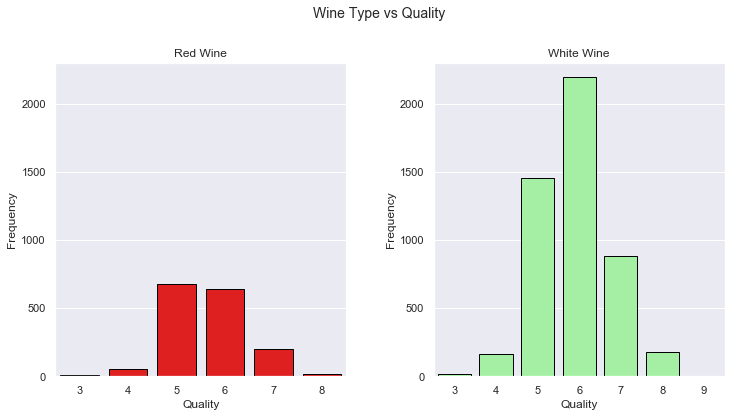

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
f.suptitle('Wine Type vs Quality', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.countplot(x='quality',
              data=wines[wines.type == 'red'],
              color='red',
              edgecolor='black',
              ax=ax1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality')
ax1.set_ylabel('Frequency',size=12)
ax1.set_ylim([0, 2300])

sns.countplot(x='quality',
              data=wines[wines.type == 'white'],
              color='palegreen',
              edgecolor='black',
              ax=ax2)
ax2.set_title('White Wine')
ax2.set_xlabel('Quality')
ax2.set_ylabel('Frequency') 
ax2.set_ylim([0, 2300])

Key takeaways:
* Both red and white wines are have a normal distribution
* Majority of red and white wines are rated 5 to 7
* Few red and white wines are rated either very good (8 – 9) or very poor (3 – 4)

(0, 3200)

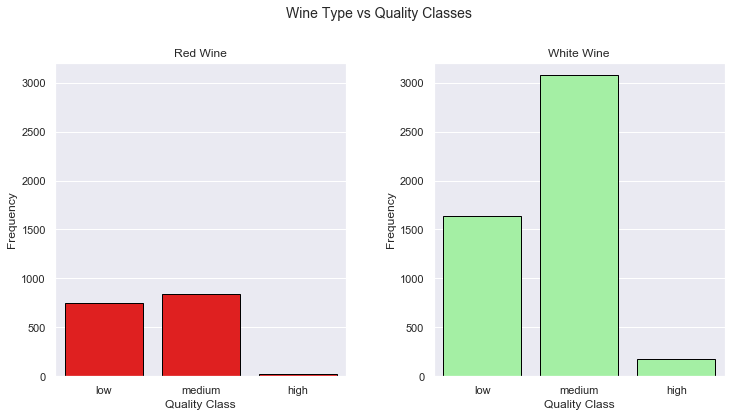

In [52]:
#Wine quality types vs. quality
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
f.suptitle('Wine Type vs Quality Classes', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.countplot(x='quality class',
              data=wines[wines.type == 'red'],
              color='red',
              order=['low','medium','high'],
              edgecolor='black',
              ax=ax1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality Class')
ax1.set_ylabel('Frequency',size=12)
ax1.set_ylim([0, 3200])

sns.countplot(x='quality class',
              data=wines[wines.type == 'white'],
              color='palegreen',
              order=['low','medium','high'],
              edgecolor='black',
              ax=ax2)
ax2.set_title('White Wine')
ax2.set_xlabel('Quality Class')
ax2.set_ylabel('Frequency',size=12) 
ax2.set_ylim([0, 3200])

Key takeaways:
* There is a definite imbalance between classes (More low to medium quality types and few high quality)